In [70]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from math import sqrt
plt.style.use('fivethirtyeight')

In [71]:
df = pd.read_csv('data/Train.csv')
column_list = df.columns

/Users/lazarus/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [72]:
# print(df.head())
print(df.describe())
# print(df.info())


            SalesID      SalePrice     MachineID        ModelID  \
count  4.011250e+05  401125.000000  4.011250e+05  401125.000000   
mean   1.919713e+06   31099.712848  1.217903e+06    6889.702980   
std    9.090215e+05   23036.898502  4.409920e+05    6221.777842   
min    1.139246e+06    4750.000000  0.000000e+00      28.000000   
25%    1.418371e+06   14500.000000  1.088697e+06    3259.000000   
50%    1.639422e+06   24000.000000  1.279490e+06    4604.000000   
75%    2.242707e+06   40000.000000  1.468067e+06    8724.000000   
max    6.333342e+06  142000.000000  2.486330e+06   37198.000000   

          datasource   auctioneerID       YearMade  MachineHoursCurrentMeter  
count  401125.000000  380989.000000  401125.000000              1.427650e+05  
mean      134.665810       6.556040    1899.156901              3.457955e+03  
std         8.962237      16.976779     291.797469              2.759026e+04  
min       121.000000       0.000000    1000.000000              0.000000e+00  
2

In [73]:
for column in column_list:
    print(column, len(df[column].unique()))

SalesID 401125
SalePrice 899
MachineID 341027
ModelID 5218
datasource 5
auctioneerID 31
YearMade 72
MachineHoursCurrentMeter 15153
UsageBand 4
saledate 3919
fiModelDesc 4999
fiBaseModel 1950
fiSecondaryDesc 176
fiModelSeries 129
fiModelDescriptor 140
ProductSize 7
fiProductClassDesc 74
state 53
ProductGroup 6
ProductGroupDesc 6
Drive_System 5
Enclosure 7
Forks 3
Pad_Type 5
Ride_Control 4
Stick 3
Transmission 9
Turbocharged 3
Blade_Extension 3
Blade_Width 7
Enclosure_Type 4
Engine_Horsepower 3
Hydraulics 13
Pushblock 3
Ripper 5
Scarifier 3
Tip_Control 4
Tire_Size 18
Coupler 4
Coupler_System 3
Grouser_Tracks 3
Hydraulics_Flow 4
Track_Type 3
Undercarriage_Pad_Width 20
Stick_Length 30
Thumb 4
Pattern_Changer 4
Grouser_Type 4
Backhoe_Mounting 3
Blade_Type 11
Travel_Controls 8
Differential_Type 5
Steering_Controls 6


In [74]:
data_list=[]
for column in column_list:
   temp_series = df[column].unique()
   data_list.append(temp_series)
d = dict(zip(column_list, data_list))
df2 = pd.DataFrame.from_dict(d, orient='index')
unique = df2.transpose()
print(unique)

            SalesID SalePrice MachineID ModelID datasource auctioneerID  \
0           1139246     66000    999089    3157        121            3   
1           1139248     57000    117657      77        132            1   
2           1139249     10000    434808    7009        136            2   
3           1139251     38500   1026470     332        149           11   
4           1139253     11000   1057373   17311        172            4   
5           1139255     26500   1001274    4605       None            7   
6           1139256     21000    772701    1937       None           99   
7           1139261     27000    902002    3539       None            6   
8           1139272     21500   1036251   36003       None            5   
9           1139275     65000   1016474    3883       None           18   
10          1139278     24000   1024998    5255       None           17   
11          1139282     22500    319906    2232       None           22   
12          1139283     3

In [75]:
df['saleyear'] = df['saledate'].str[-9:-4].astype('int32')
df['age'] = df['saleyear'] - df['YearMade']



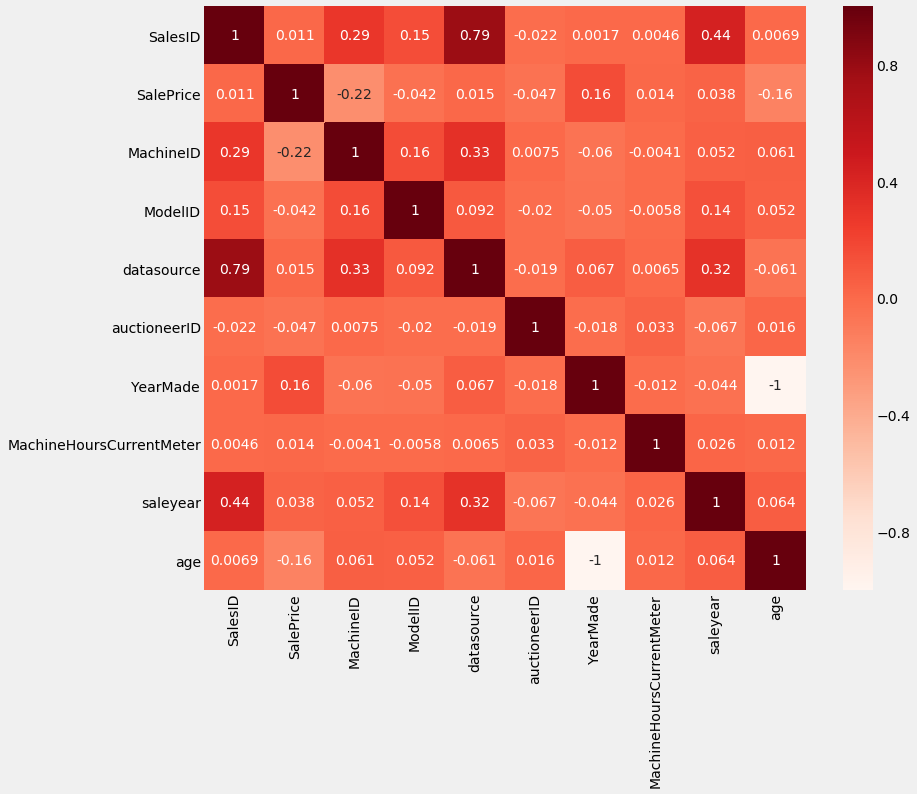

In [76]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [77]:
# df['age'] = 
pd.to_datetime(df['saledate'])

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
5        2008-12-18
6        2004-08-26
7        2005-11-17
8        2009-08-27
9        2007-08-09
10       2008-08-21
11       2006-08-24
12       2005-10-20
13       2006-01-26
14       2006-01-03
15       2006-11-16
16       2007-06-14
17       2010-01-28
18       2006-03-09
19       2005-11-17
20       2006-05-18
21       2006-10-19
22       2007-10-25
23       2006-10-19
24       2004-05-20
25       2006-03-09
26       2006-03-09
27       2007-02-22
28       2007-08-09
29       2006-06-01
            ...    
401095   2011-12-14
401096   2011-09-15
401097   2011-10-28
401098   2011-08-16
401099   2011-12-14
401100   2011-08-16
401101   2011-12-14
401102   2011-08-16
401103   2011-09-15
401104   2011-08-16
401105   2011-10-25
401106   2011-08-16
401107   2011-09-15
401108   2011-08-16
401109   2011-08-16
401110   2011-09-15
401111   2011-10-25
401112   2011-10-25
401113   2011-10-25


In [81]:
df_clean = pd.read_csv('./data/CleanTrainData.csv')

In [82]:
df_clean.describe()

,Unnamed: 0,SalePrice,YearMade,saleyear,age,Turbo_binary,PrGrp_BL,PrGrp_MG,PrGrp_SSL,PrGrp_TEX,PrGrp_TTT,PrGrp_WL,Enc_EROPS,Enc_EROPS w AC,Enc_OROPS
count,362794.000000,362794.000000,362794.000000,362794.000000,362794.000000,362794.000000,362794.000000,362794.000000,362794.000000,362794.000000,362794.000000,362794.000000,362794.000000,362794.000000,362794.000000
mean,196994.315154,32224.879659,1993.787039,2003.979435,10.192396,0.010535,0.205657,0.062407,0.108819,0.243954,0.202217,0.176946,0.335143,0.226167,0.437987
std,116081.058855,23428.172346,9.571299,5.841061,7.437785,0.102098,0.404181,0.241894,0.311413,0.429466,0.401654,0.381624,0.472041,0.418349,0.496140
min,0.000000,4750.000000,1937.000000,1989.000000,-12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,96841.250000,15000.000000,1988.000000,2000.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,189053.500000,25000.000000,1996.000000,2006.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,299852.750000,42000.000000,2001.000000,2009.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,401124.000000,142000.000000,2013.000000,2011.000000,62.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


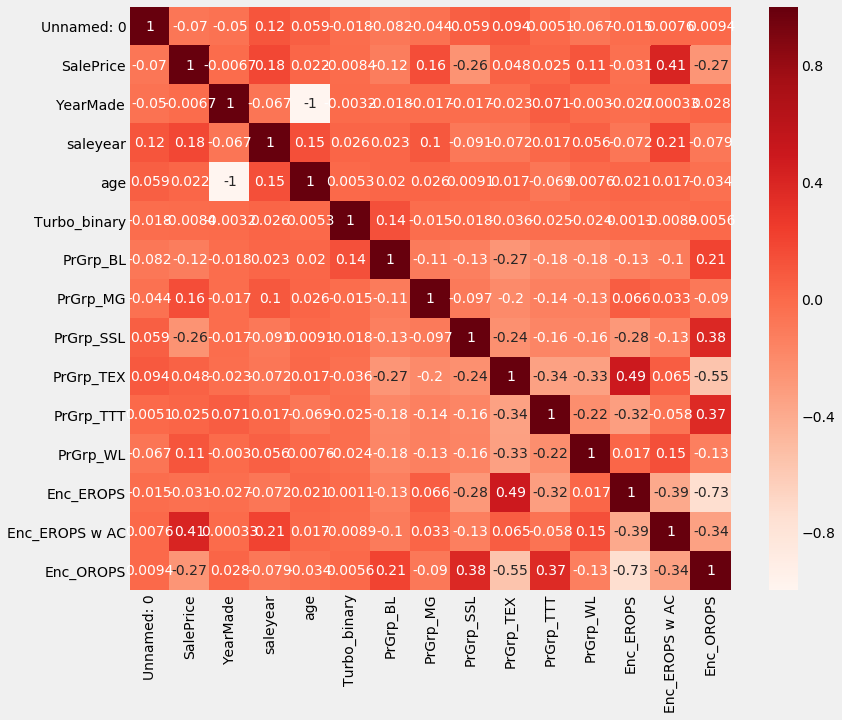

<Figure size 432x288 with 0 Axes>

In [80]:
plt.figure(figsize=(12,10))
cor = df_clean.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
plt.savefig('heatmap.png')